# Feature Selection for Example Cities

In [1]:
from sklearn.linear_model import LassoCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [23]:
def combine_city_data(city_code, dfs, names):
    """
    Generate a single DataFrame with data from all years for one city.
    """
    data_rows = [df.loc[city_code] for df in dfs]
    all_data = pd.concat(data_rows, axis=1)
    all_data.columns = names
    all_data.index.name = 'Year'
    return all_data
    

def import_training_data(filename):
    return pd.read_csv('../data/train/%s' % filename, index_col='UACE Code', dtype={'UACE Code': str})

city_info = pd.read_csv('../data/Cities.csv', index_col='UACE Code', dtype={'UACE Code': str})

def get_city_code(name):
    return city_info[city_info['Primary UZA Name'] == name].index[0]

def get_city_name(code):
    return city_info.loc[code]['Primary UZA Name'].iloc[0]

def plot_correlations(city, features):
    xdfs = [import_training_data('%s.csv' % name) for name in features]
    city_xvals = combine_city_data(city, xdfs, features)
    correlation_matrix = city_xvals.corr()
    plt.figure(figsize=(10, 8))  # Adjust size as necessary
    sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, vmin=-1.0)
    plt.title("Correlation Matrix (%s)" % get_city_name(city))
    plt.show()

In [35]:
city = get_city_code('Columbus, OH')

ynames = ['UPT_percap']#, 'PMT_percap', 'FARES_infladj_percap']
ydfs = [import_training_data('%s.csv' % name) for name in ynames]
city_yvals = combine_city_data(city, ydfs, ynames)

In [46]:
all_features = [
    'VRM_percap', 
    'VRH_percap', 
    'VOMS_percap', 
    'OpExp_GA_frac', 
    'OpExp_VM_frac', 
    'OpExp_VO_frac',
    'OpExp_Total_infladj_percap', 
    'OpFund_infladj_percap', 
    'CapFund_infladj_percap', 
    'OpFund_frac', 
    'TotalFund_infladj_percap', 
    'FedFund_frac', 
    'StateFund_frac', 
    'LocalFund_frac', 
]
xdfs = [import_training_data('%s.csv' % name) for name in all_features]
city_xvals = combine_city_data(city, xdfs, all_features)

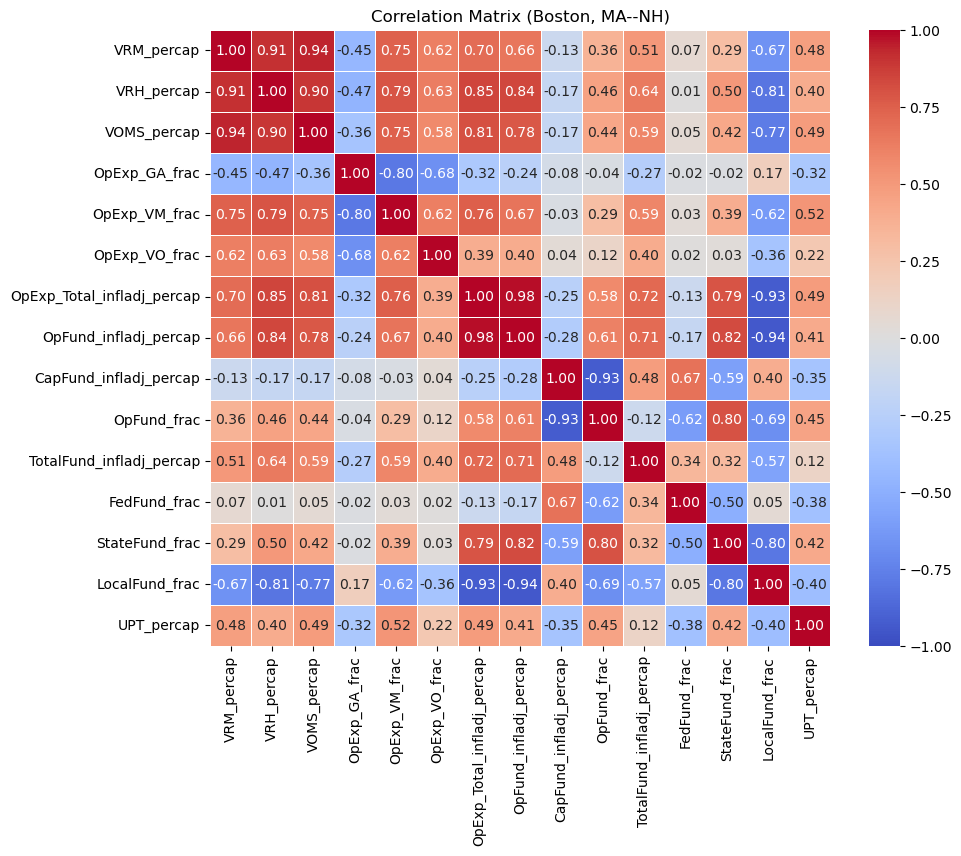

In [48]:
plot_correlations(city, all_features + ['UPT_percap'])

In [49]:
lasso_pipe = Pipeline([
    ('scale', StandardScaler()),  
    ('lasso', LassoCV(alphas=None, cv=5, max_iter=100000))  
])

y = city_yvals.values.ravel()
X = city_xvals.values

lasso_pipe.fit(X, y)

print("The LASSO Regression coefficients are:")
print(lasso_pipe.named_steps['lasso'].coef_)

The LASSO Regression coefficients are:
[-0.52980159 -0.68433756  0.          0.40941512 -0.00078399 -0.6290679
 -0.         -0.         -0.          0.         -0.2685205   0.3239621
 -0.01251456  0.        ]


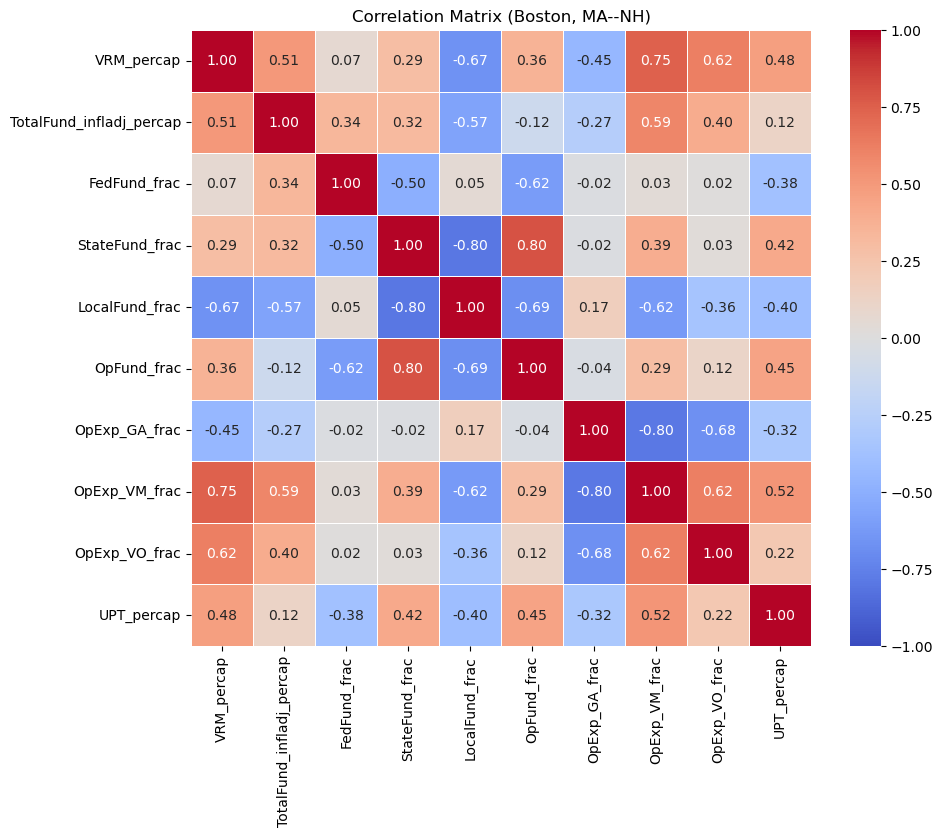

In [57]:
select_features = [
    'VRM_percap',
    'TotalFund_infladj_percap', 
    'FedFund_frac', 
    'StateFund_frac', 
    'LocalFund_frac', 
    'OpFund_frac', 
    'OpExp_GA_frac', 
    'OpExp_VM_frac', 
    'OpExp_VO_frac'
]
xdfs = [import_training_data('%s.csv' % name) for name in select_features]
city_xvals = combine_city_data(city, xdfs, select_features)
plot_correlations(city, select_features + ['UPT_percap'])

In [56]:
y = city_yvals.values.ravel()
X = city_xvals.values

lasso_pipe.fit(X, y)

print("The LASSO Regression coefficients are:")
print(lasso_pipe.named_steps['lasso'].coef_)

The LASSO Regression coefficients are:
[-0.96732554 -0.33724235  0.25491128 -0.22218586  0.         -0.
  0.43540732 -0.         -0.72238647]


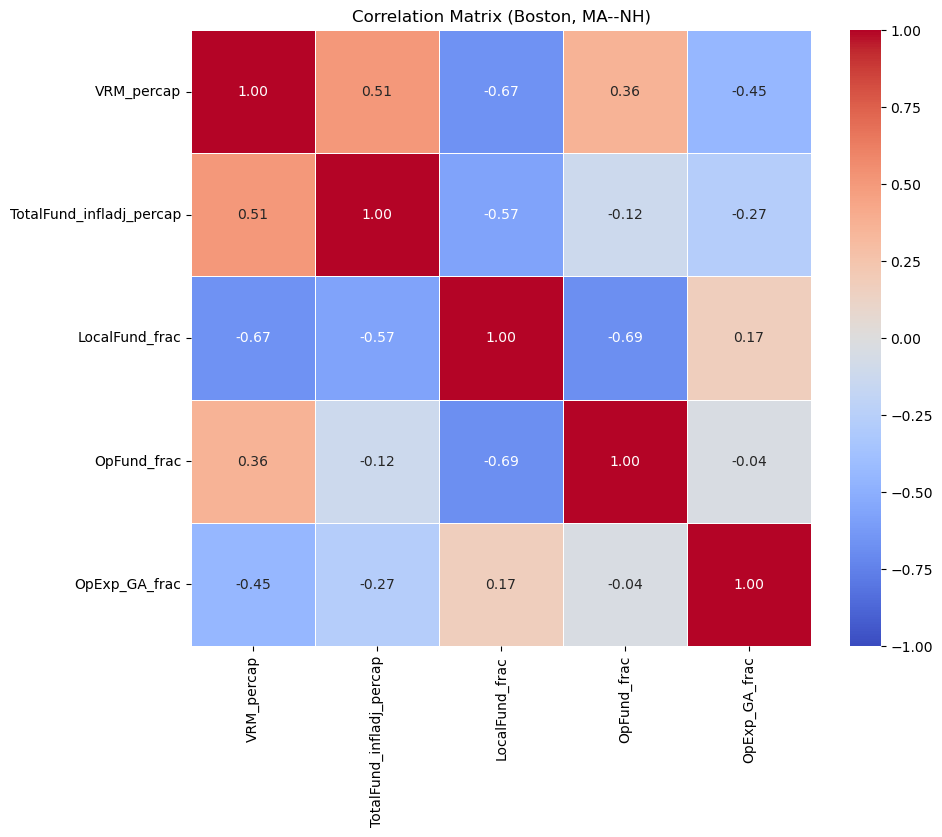

In [59]:
select_features = [
    'VRM_percap',
    'TotalFund_infladj_percap',
    'LocalFund_frac', 
    'OpFund_frac', 
    'OpExp_GA_frac',
]
xdfs = [import_training_data('%s.csv' % name) for name in select_features]
city_xvals = combine_city_data(city, xdfs, select_features)
plot_correlations(city, select_features)

In [60]:
y = city_yvals.values.ravel()
X = city_xvals.values

lasso_pipe.fit(X, y)

print("The LASSO Regression coefficients are:")
print(lasso_pipe.named_steps['lasso'].coef_)

The LASSO Regression coefficients are:
[-1.11531318 -0.51625215  0.         -0.34377831  0.8498012 ]


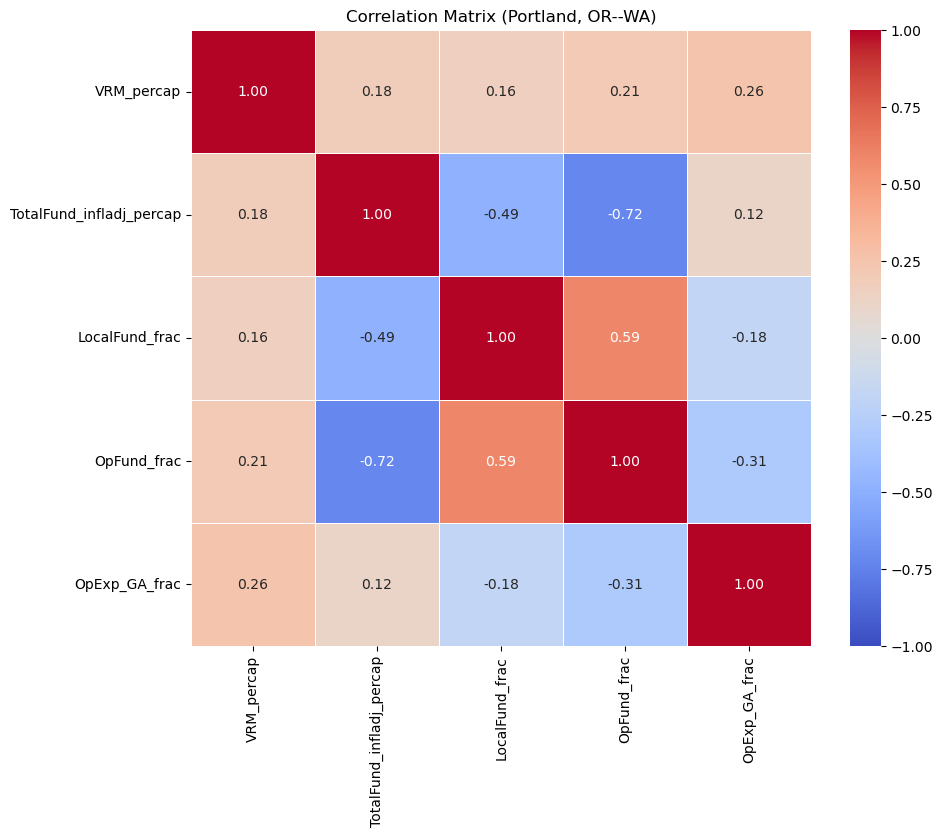

In [61]:
city = get_city_code('Portland, OR--WA')
xdfs = [import_training_data('%s.csv' % name) for name in select_features]
city_xvals = combine_city_data(city, xdfs, select_features)
ydfs = [import_training_data('%s.csv' % name) for name in ynames]
city_yvals = combine_city_data(city, ydfs, ynames)
plot_correlations(city, select_features)

In [62]:
y = city_yvals.values.ravel()
X = city_xvals.values

lasso_pipe.fit(X, y)

print("The LASSO Regression coefficients are:")
print(lasso_pipe.named_steps['lasso'].coef_)

The LASSO Regression coefficients are:
[ 4.6683661   1.31517635 -0.40619509  1.46012387  0.        ]


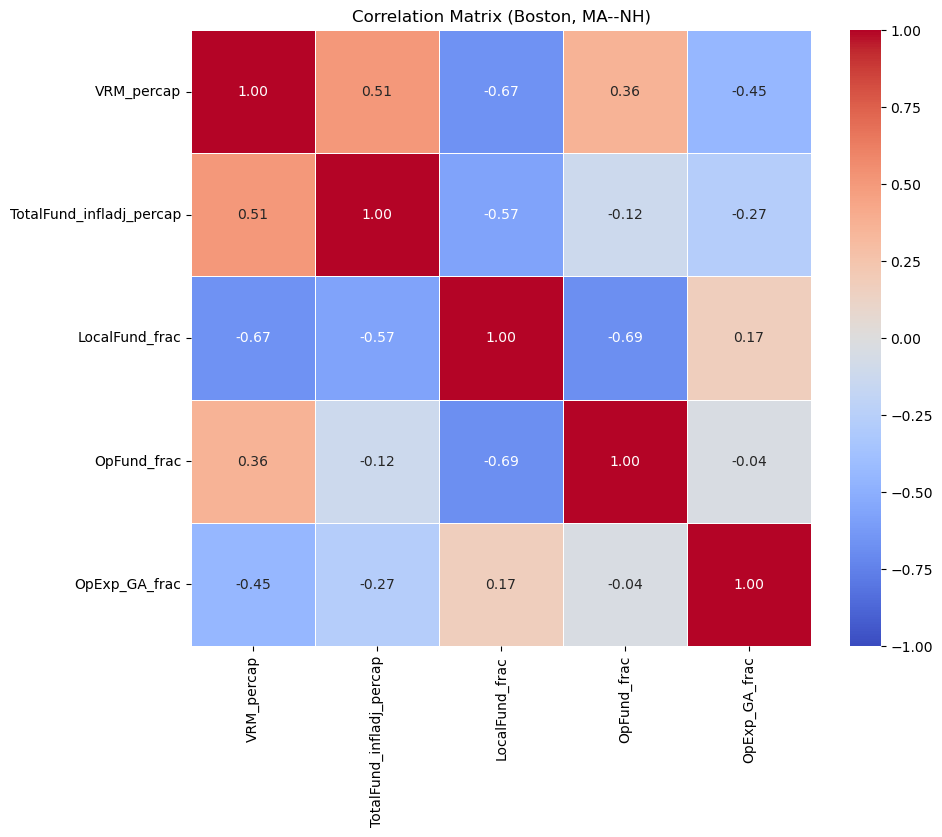

In [40]:
city = get_city_code('Boston, MA--NH')
plot_correlations(city, select_features)